In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv('nobel.csv')

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [18]:
nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [19]:
top_gender = nobel['sex'].mode()[0]
top_country = nobel['birth_country'].mode()[0]

print(f"Most commonly awarded gender is: {top_gender}")
print(f"Most commonly awarded birth country is: {top_country}")


Most commonly awarded gender is: Male
Most commonly awarded birth country is: United States of America


#### Identify the decade with the highest ratio of US-born winners

In [20]:
# Create a column to flag US-born winners
nobel['is_us_born'] = nobel['birth_country'] == 'United States of America'

# Create a decade column
nobel['decade'] = (nobel['year'] // 10) * 10

# Calculate the ratio of US-born winners by decade
us_born_ratio = nobel.groupby('decade')['is_us_born'].mean()

# Find the decade with the highest ratio
max_decade_usa = us_born_ratio.idxmax()

print(f"Decade with highest US-born ratio: {max_decade_usa}")

Decade with highest US-born ratio: 2000


### Plot for visualization

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rashid Iqbal\AppData\Local\Temp\ipykernel_6444\4244581561.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.figure.show()


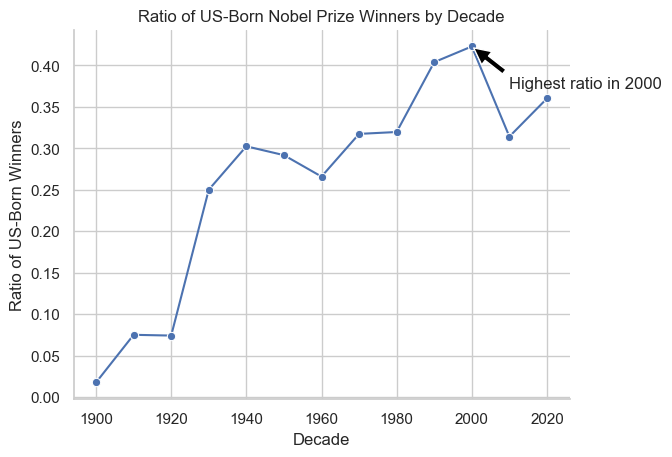

In [21]:
import seaborn as sns
import pandas as pd

# Create a column to flag US-born winners
nobel['is_us_born'] = nobel['birth_country'] == 'United States of America'

# Create a decade column
nobel['decade'] = (nobel['year'] // 10) * 10

# Calculate the ratio of US-born winners by decade
us_born_ratio = nobel.groupby('decade')['is_us_born'].mean().reset_index()
us_born_ratio.columns = ['decade', 'ratio']

# Create a seaborn plot
sns.set(style="whitegrid")
plot = sns.lineplot(data=us_born_ratio, x='decade', y='ratio', marker='o')

# Annotate the plot with the decade having the highest ratio
max_decade_usa = us_born_ratio.loc[us_born_ratio['ratio'].idxmax(), 'decade']
plot.annotate(f"Highest ratio in {max_decade_usa}", 
              xy=(max_decade_usa, us_born_ratio['ratio'].max()), 
              xytext=(max_decade_usa + 10, us_born_ratio['ratio'].max() - 0.05),
              arrowprops=dict(facecolor='black', shrink=0.05))

plot.set_title('Ratio of US-Born Nobel Prize Winners by Decade')
plot.set_xlabel('Decade')
plot.set_ylabel('Ratio of US-Born Winners')

# Display the plot
sns.despine()
plot.figure.show()

#### Find the decade and category with the highest proportion of female laureates

In [22]:
female_proportion = nobel[nobel['sex'] == 'Female'].groupby(['decade', 'category']).size() / nobel.groupby(['decade', 'category']).size()
max_female_combination = female_proportion.idxmax()
max_female_dict = {max_female_combination[0]: max_female_combination[1]}

### Plot for visualization

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rashid Iqbal\AppData\Local\Temp\ipykernel_6444\1456879227.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


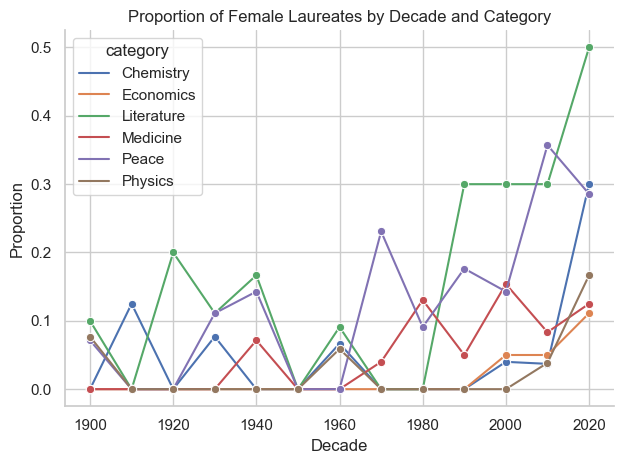

In [23]:
female_proportion_df = female_proportion.unstack().fillna(0).reset_index()
melted_female_proportion_df = pd.melt(female_proportion_df, id_vars='decade', var_name='category', value_name='proportion')

# Create the plot and get the Axes object
ax = sns.lineplot(data=melted_female_proportion_df, x='decade', y='proportion', hue='category', marker='o')

# Set title and labels
ax.set_title('Proportion of Female Laureates by Decade and Category')
ax.set_xlabel('Decade')
ax.set_ylabel('Proportion')

# Adjust the plot using seaborn's despine function
sns.despine(ax=ax)

# Show the plot
ax.figure.tight_layout()
ax.figure.show()

In [24]:
print(f"Decade and category combination with the highest proportion of female laureates is: {max_female_dict}")

Decade and category combination with the highest proportion of female laureates is: {2020: 'Literature'}


#### Find the first woman to receive a Nobel Prize

In [25]:
first_woman = nobel[nobel['sex'] == 'Female'].sort_values(by='year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

print(f"First woman to receive a Nobel Prize was: {first_woman_name} in the category: {first_woman_category}")

First woman to receive a Nobel Prize was: Marie Curie, née Sklodowska in the category: Physics


In [26]:
repeat_winners = nobel['full_name'].value_counts()[nobel['full_name'].value_counts() > 1].index.tolist()

print(f"Individuals or organizations that have won more than one Nobel Prize: {repeat_winners}")

Individuals or organizations that have won more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


### Plot Visualization

C:\Users\Rashid Iqbal\AppData\Local\Temp\ipykernel_6444\2747188138.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plot.figure.tight_layout()
C:\Users\Rashid Iqbal\AppData\Local\Temp\ipykernel_6444\2747188138.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.figure.show()


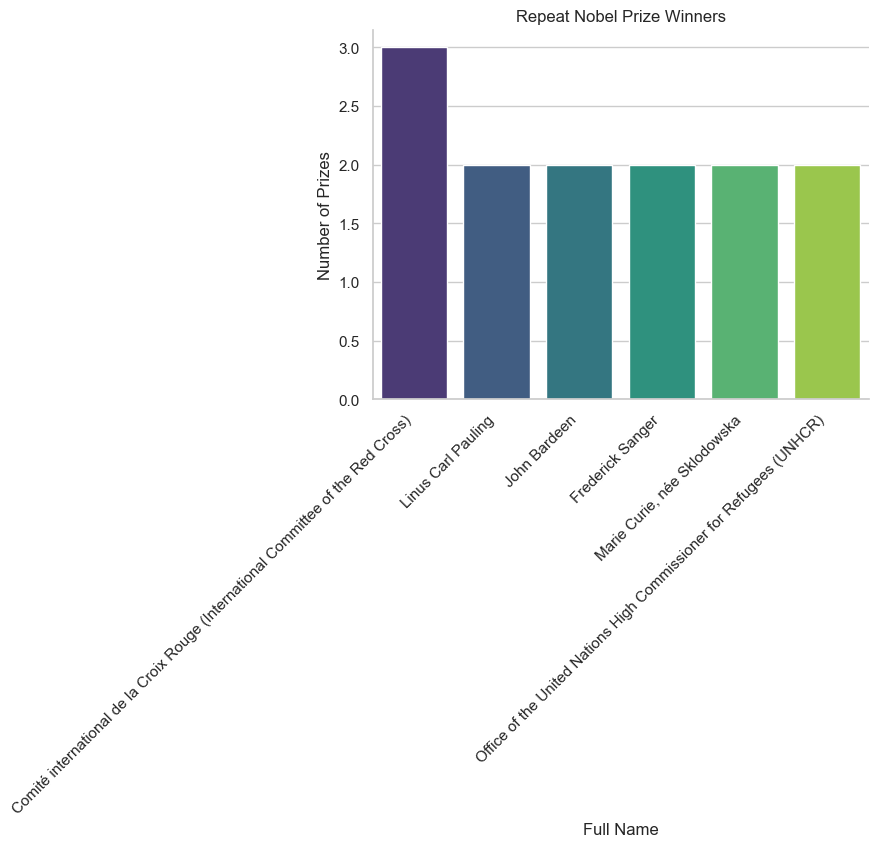

In [27]:
# Count the number of prizes each laureate or organization has won
repeat_winners_counts = nobel['full_name'].value_counts()
repeat_winners_counts = repeat_winners_counts[repeat_winners_counts > 1].reset_index()
repeat_winners_counts.columns = ['full_name', 'count']

# Create a seaborn bar plot
sns.set(style="whitegrid")
plot = sns.barplot(data=repeat_winners_counts, x='full_name', y='count', palette='viridis')

# Title and labels
plot.set_title('Repeat Nobel Prize Winners')
plot.set_xlabel('Full Name')
plot.set_ylabel('Number of Prizes')

# Rotate x labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to make room for the rotated labels
plot.figure.tight_layout()

# Display the plot
sns.despine()
plot.figure.show()